## Department of Computer Science, University of York
### DATA: Introduction to Data Science

## Task 1: Domain Analysis  (5 marks)

Given the business domain and the data overview presented (in the assessment paper), provide a brief description of

* the business problem and its significance to the relevant sector;
* the link between the business problem and the field of data science;
* the main areas of investigation; and
* potential ideas and solutions.


**Word Limit:** 300 words

**Write your answer here (text cell(s) to be used, as appropriate)**

As a well-established Bank, we need to keep customer service as a high priority to maintain our clients. Thus the business problem presented to the DATA Intelligence team was improving customer service by making fair and accurate data-driven decisions on customer risk assessment and a customer retention scheme. This directly links to the field of data science due to the decision-making needing accurate solutions with fair and ethical means that we can find by modelling the data of the Bank. By using data science we can make sure the accuracy of our solutions is as high as possible and we can make sure that our decisions are ethical and fair by checking the correlation to our client's demographics. The main areas I want to investigate are Loans and why someone may have a bad loan status, and which of our clients are the most valuable so that we can give them even more benefits or get other clients to be like them, which would be to do with card types, a good loan_status and their average salary. My idea for investigating loan status is to see if there are significant differences in loan status by city, and then see if certain client demographics relate to being in that city. After that, I'll look at the client's spending habits to determine if they relate to their loan status. Additionally, my idea for seeing our most valuable clients is to find which of our card types has the best transaction amount and balance, and then check if they also have a good loan status and average salary, if both are good then we should offer benefits to them, like the ability to take higher loans or better loan interest rates, or the ability to withdraw more, which would be a good customer retention scheme.


----
----


## Task 2: Database Design (25 marks)


Having understood the business domain, present a conceptual design in the form of an entity-relationship (ER) model that would be helpful in creating a database for the bank.

The bank data currently exists in the form of a csv file called *BankRecords.csv*, provided on VLE (path given in page 5, assessment paper). This file has all the existing records. The table available in the csv file is unnormalised. The information about its different columns is given in Tables 1 and 2 (in the assessment paper).

Following the standard principles of database normalisation, normalise the given table (*BankRecords.csv*) to a database schema that has minimum redundancies. Then, using the designed schema, create an SQLite database.

Your answer should include the SQL statements needed to accomplish this step. Your submission should also include the created SQLite database file.

Your answer should clearly cover the following:
* Any assumptions you are making about the given scenario;
* The designated keys, existing relationships, and identified functional dependencies;
* The steps followed and justifications for the decisions made.

**World Limit**: 500 words. This limit applies only to the explanations. There is no limit on any associated code/SQL statements or figures.

**Write your answer here (text cell(s) to be used, as appropriate)**

To make my Entity-Relationship model I first started by reading through the columns of the 'BankRecords.csv' file. After noticing the pattern in attributes that relate to each other I split the data into 9 entities Accounts, Clients, Cards, Dispositons, Transactions, Partners, Loans, Orders and CityInfo. It was clear to see what belongs to each table due to there being a clear key/id identifier in the naming of each attribute and if I couldn't find something in the name, the description of the attribute directly linked it to the key/id it belongs to. The primary keys for my entities were as follows: Accounts: account_id, Clients: clinet_id, Cards: card_id, Dispositions: disp_id, Transactions: trans_id, Partners: partner_account, Loans: Loan_id, Orders: order_id and CityInfo: a1. After linking entities to attributes I then had to find which entities have partial or total participation with each other, and in my research I found that Accounts and Clients have total participation both ways as well as Clients and CityInfo, and also Cards and Dispositions. Furthermore, Loans, Orders and Transactions all have total participation towards Accounts but Accounts only have partial participation with them, furthermore Clients have partial participation to Cards but Cards have a total participation to Clients, just like Transactions have total participation with Partners but Partners have only partial participation to Transactions. Next, I wrote whether the relationships were one-to-many or one-to-one, etc. which you can view in the ER model attached.


My first step in creating the database was to make an empty database called "BankRecords.db" in the DB browser for SQLite. Then after creating the file, I coded a connection to the database using sqlite3 and then used pandas to read the given CSV file and place the data into a dataframe(df). From the data frame, we could then use the connection to the database to create the table 'Records' and place all the data from the data frame into that table.

"""import pandas as pd
import sqlite3

conn = sqlite3.connect("BankRecords.db")
df = pd.read_csv("BankRecords.csv", low_memory=False)

df.to_sql('Records', conn, index = False, if_exists='replace')

conn.close()"""


Now within the DB browser for SQLite, I used the table 'Records' to get the data for my new tables. Using my ER model which shows a concept of a normalised table, I then begin splitting 'Records' into the needed tables. While creating the tables I also had to delete all the missing values in order to normalise the database. In addition to just copying the ER model I also had to add foreign and or alternative keys to the tables in order to link tables to each other. I used the relationships in my ER model as a direct inspiration for which attributes I used as the foreign keys and for which tables should link to each other. In conclusion, we brought the database to 2NF by splitting it into multiple tables and then by adding all necessary keys and also separating and placing Partners and Transactions, as well as Cards and Dispositions in different tables we brought the database to the highest NF.

#SQL code to create tables:
"""CREATE TABLE Accounts AS
SELECT DISTINCT account_id, frequency, creation_date,client_id
FROM Records

DELETE FROM Accounts
WHERE account_id IS NULL

CREATE TABLE Loans AS
SELECT DISTINCT loan_id,loan_date,loan_amount,loan_duration,loan_payments,loan_status,account_id
FROM Records

DELETE FROM Loans
WHERE loan_id IS NULL

CREATE TABLE Orders AS
SELECT DISTINCT order_id,bank_to,account_to,order_amount,payment_type,account_id
FROM Records

DELETE FROM Orders
WHERE order_id IS NULL

CREATE TABLE Transactions AS
SELECT DISTINCT trans_id,trans_date,trans_type,operation,trans_amount,balance,trans_detail,partner_account,account_id
FROM Records

CREATE TABLE Partners AS
SELECT DISTINCT partner_account,partner_bank
FROM Records

DELETE FROM Partners
WHERE partner_account IS NULL

DELETE FROM Partners
WHERE partner_bank IS NULL

CREATE TABLE Cards AS
SELECT DISTINCT card_id, card_type,card_issued,disp_id
FROM Records

DELETE FROM Cards
WHERE card_id IS NULL

CREATE TABLE Clients AS
SELECT DISTINCT client_id,birth_number,card_id
FROM Records
WHERE card_id IS NOT NULL

CREATE TABLE Dispostions AS
SELECT DISTINCT disp_id,disp_type
FROM Records

CREATE TABLE CityInfo AS
SELECT DISTINCT a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,client_id
FROM Records"""

#Deleted Records Table from database using DB Browser for SQLite by selecting the table and deleting it.

----
----


## Task 3: Research Design (25 Marks)

Using the database designed in Task 2, design and implement **five** potential modelling solutions to achieve the aim of the Data Intelligence team. You need to provide clear justifications about the techniques selected in the context of the 'problem in hand'. Your design must consist of a combination of inferential statistics, supervised learning algorithms, and unsupervised learning algorithms, and include **at least one** of those techniques. Finally, your modelling solutions should be of sufficient complexity, combining information from multiple tables from the database built in Task 2, as appropriate. Your answer should clearly show the queries made to the database. If amendments are made to the database, the commands should be clearly included in your answer.

Your answer should clearly cover the following:
* Any assumptions you are making about the given scenario;
* Any data processing and data integrity steps you would undertake to make the data fit for purpose;
* Which technique(s) you would apply for each solution and why;
* An evaluation of the techniques applied in terms of the accuracy of their results (or any other suitable evaluation measure);
* Algorithmic parameters should be adequately stated and discussed;
* A discussion of ethical considerations arising from the solutions selected.

**World Limit**: 500 words. This limit applies only to the explanations. There is no limit on any associated code or figures.

**Write your answer here (text cell(s) to be used, as appropriate)**

As I mentioned in my brief description I wanted to find out why someone would have a bad loan status, so that we can do customer risk assessments on whether or not we should give the client a loan. I started by seeing if there is a significant difference in loan status by city, to see if a client's city may affect their loan status. To do this I made a dataframe of account_id, loan_status and a2(Cities). Then to see if my hypothesis that there was a significant difference in loan status by city I used the chi-square test from Inferential Statistics as my modeling solution. Since it would give me a accurate output of whether there was a significant difference or not. Following that solution, I wanted to then see the cities with the worst loan statuses. So I then made a bar graph of only statuses B and D since they were the worst ones.

Chi-square statistic: 297.82095967978967
P-value: 0.0012819088961128781
The distribution of loan statuses is significantly different across cities.


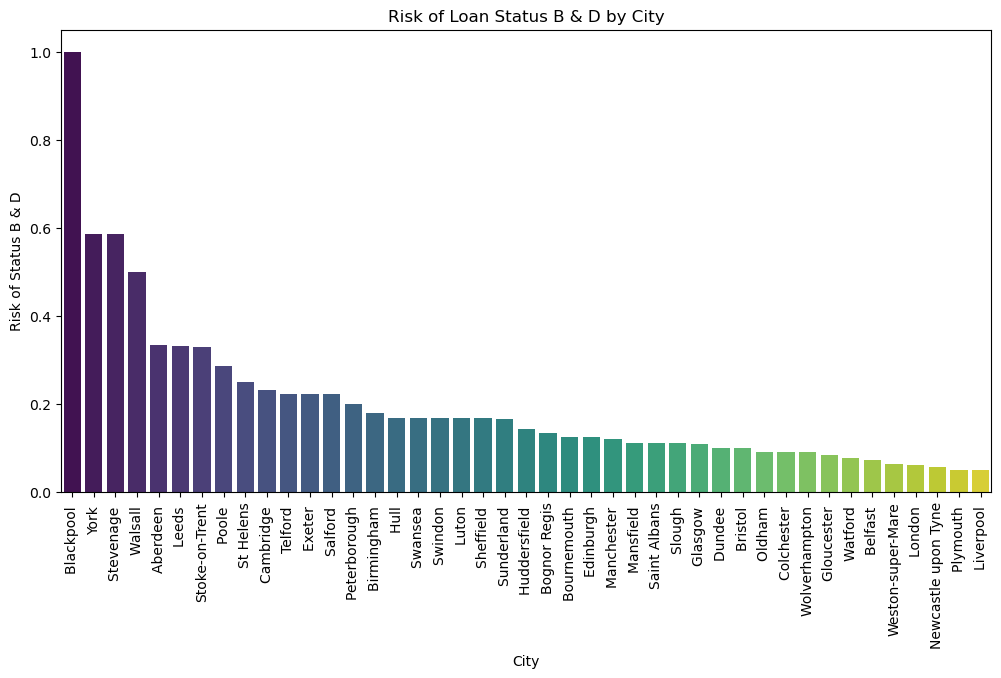

In [36]:
import pandas as pd
import sqlite3
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect("BankRecords.db")

query = """SELECT Accounts.account_id, Loans.loan_status, CityInfo.a2
           FROM Loans
           JOIN Accounts ON Loans.account_id = Accounts.account_id
           JOIN CityInfo ON 
           Accounts.client_id = CityInfo.client_id"""

df = pd.read_sql_query(query, conn)

# Creates a contingency table for all loan statuses
c_table = pd.crosstab(df['a2'], df['loan_status'])

# Performs chi-square test for independence
chi2, p, _, _ = chi2_contingency(c_table)

# Outputs results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Checks significance level
alpha = 0.05
if p < alpha:
    print("The distribution of loan statuses is significantly different across cities.")
else:
    print("There is no significant difference in the distribution of loan statuses across cities.")
    
# Calculates the proportion of loans in status 'B' and 'D' for each city
loan_counts = df.groupby(['a2', 'loan_status']).size().unstack().fillna(0)
loan_counts['risk_of_status'] = loan_counts['D'] / loan_counts.sum(axis=1)
loan_counts['risk_of_status'] += loan_counts['B'] / loan_counts.sum(axis=1)


# Filters cities with a risk of 'B' and 'D' greater than 0
f_cities = loan_counts[loan_counts['risk_of_status'] > 0]

# Sorts cities based on the risk of being in status 'B' and 'D'
s_cities = f_cities.sort_values(by='risk_of_status', ascending=False)

# Plots the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=s_cities.index, y=s_cities['risk_of_status'], palette='viridis')
plt.xticks(rotation= 90)
plt.title('Risk of Loan Status B & D by City')
plt.xlabel('City')
plt.ylabel('Risk of Status B & D')
plt.show()

Continuing my research into why someone may have a bad loan status I wanted to see if the demographics of the client affected their loan status. In this modelling solution, I used Logistic Regression from supervised learning on demographics: a11(average salary),a12(unemployment in 1995),a13(unemployment in 1996),a15(no. of committed crimes in 1995),a16(no. of committed crimes in 1996) against loan status to see if there was any relation between them. This is to make sure we can make a fair and ethical decision when making a risk assessment of a client's demographics.

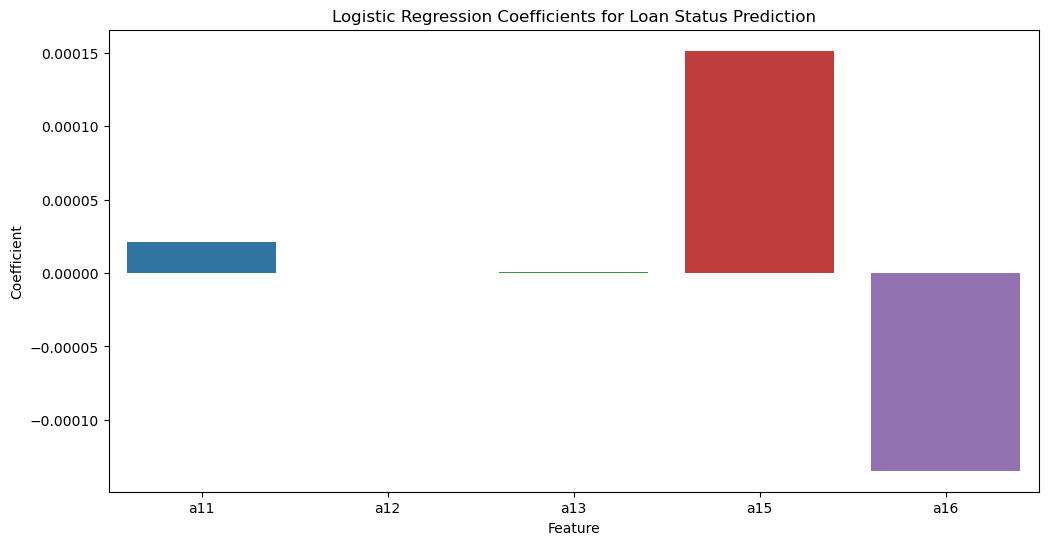

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import sqlite3

conn = sqlite3.connect("BankRecords.db")

query = """SELECT Accounts.account_id, Loans.loan_status, CityInfo.a11, CityInfo.a12, CityInfo.a13, CityInfo.a15, CityInfo.a16
           FROM Loans
           JOIN Accounts ON Loans.account_id = Accounts.account_id
           JOIN CityInfo ON 
           Accounts.client_id = CityInfo.client_id"""

df = pd.read_sql_query(query, conn)

# Filters the DataFrame to include only loan statuses 'B' and 'D'
df = df[df['loan_status'].isin(['B', 'D'])]

# Encodes loan_status using LabelEncoder
label_encoder = LabelEncoder()
df['loan_status_encoded'] = label_encoder.fit_transform(df['loan_status'])

# The features
a_features = ['a11', 'a12', 'a13', 'a15', 'a16']

# Prepare the features (X) and target (y)
X = df[a_features]
y = df['loan_status_encoded']

# Handles missing values by imputing them
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Creates a Logistic Regression model
model = LogisticRegression(random_state=42)

# Trains the model
model.fit(X_train, y_train)

# Plots the coefficients for each feature
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Coefficient', data=pd.DataFrame({'Feature': a_features, 'Coefficient': model.coef_[0]}))
plt.title('Logistic Regression Coefficients for Loan Status Prediction')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()


My final modelling solution for Loans is to look at the spending habits of our clients and then see how they correlate to loan status and if we can use this data to predict a client's loan status using their spending habits. In this solution I used a Random Forest Classifier from supervised learning to find the correlation between spending habits: trans_amount, loan_amount and order_amount, and loan status. To make sure this is accurate we have cross-validation to increase accuracy. 

Cross-Validation Scores: [0.99664866 0.99616182 0.99635429 0.99670524 0.99660334]
Mean CV Accuracy: 0.9964946691316541


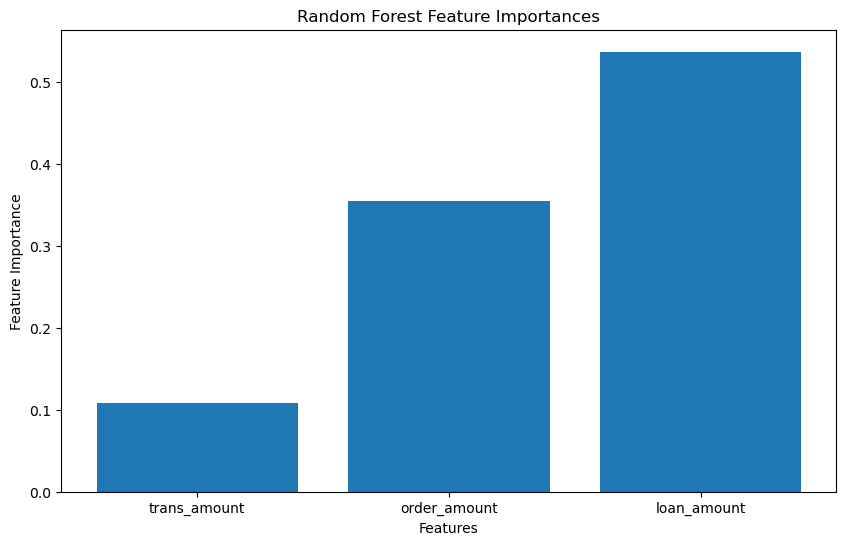


Random Forest Accuracy: 0.9967573638636281
Confusion Matrix:
 [[49940    35    46     1]
 [   39  3931     8     1]
 [   82     4 52301    64]
 [    1     2    75  3874]]

Predicted Loan Status: ['C']


In [38]:
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Loads data from the SQLite database
conn = sqlite3.connect("BankRecords.db")

query = """SELECT Accounts.account_id, Transactions.trans_amount, Orders.order_amount, Loans.loan_amount, Loans.loan_status
           FROM Transactions
           JOIN Accounts ON Transactions.account_id = Accounts.account_id
           JOIN Orders ON Accounts.account_id = Orders.account_id
           JOIN Loans ON Loans.account_id = Orders.account_id"""

df = pd.read_sql_query(query, conn)

# Closes the database connection
conn.close()

# Drops missing values if any
df = df.dropna()

# Defines features and target variable
X = df[['trans_amount', 'order_amount', 'loan_amount']]
y = df['loan_status']

# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scales features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creates a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Cross-validating the training set
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Fits the model onto the training set
rf_model.fit(X_train_scaled, y_train)

# Features importances from Random Forest
f_importances = rf_model.feature_importances_
f_names = X.columns

# Displays feature importances using a bar graph
plt.figure(figsize=(10, 6))
plt.bar(f_names, f_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()

# Makes predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluates the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred)
conf_matrix_rf = confusion_matrix(y_test, y_pred)

print("\nRandom Forest Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

# Manually input features for prediction
manual_input = pd.DataFrame([[5000, 10000, 300000]], columns=['trans_amount', 'order_amount', 'loan_amount'])
manual_input_scaled = scaler.transform(manual_input)

# Predicts the loan_status for the manually inputted features
predicted_ls = rf_model.predict(manual_input_scaled)
print("\nPredicted Loan Status:", predicted_ls)


The next area of investigation was for a customer retention scheme, so I decided to try to find our most valuable customers, by seeing which card type has the highest mean balance and trans_amount. To achieve this I used ANOVA from Inferential Statistics because it's a great way to evaluate the differences in means of several groups. My hypothesis is that the gold card type has the best mean values. Thus we should try to give customers incentives to upgrade if this is true.

ANOVA p-value for trans_amount: 4.515822952318014e-61
ANOVA p-value for balance: 0.0
The p-value for trans_amount is below 0.05. There are significant differences in mean trans_amount between card types.
The p-value for balance is below 0.05. There are significant differences in mean balance between card types.


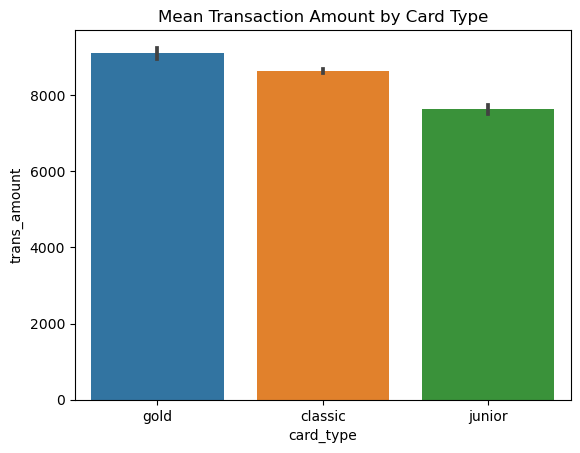

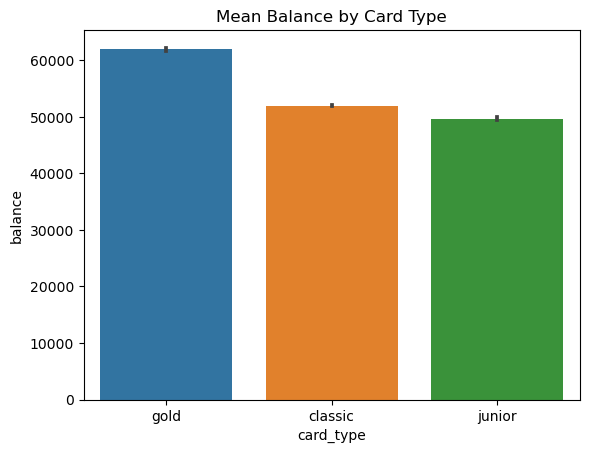

In [39]:
import pandas as pd
import sqlite3
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect("BankRecords.db")

query = """SELECT Accounts.account_id, Transactions.trans_amount, Transactions.balance, Clients.client_id, Cards.card_type
           FROM Transactions
           JOIN Accounts ON Transactions.account_id = Accounts.account_id
           JOIN Clients ON Accounts.client_id = CLients.client_id
           JOIN Cards ON
           Clients.card_id = Cards.card_id"""

df = pd.read_sql_query(query, conn)

# Performs ANOVA for 'trans_amount'
anova_trans_amount = f_oneway(
    df[df['card_type'] == 'gold']['trans_amount'],
    df[df['card_type'] == 'classic']['trans_amount'],
    df[df['card_type'] == 'junior']['trans_amount'])

# Performs ANOVA for 'balance'
anova_balance = f_oneway(
    df[df['card_type'] == 'gold']['balance'],
    df[df['card_type'] == 'classic']['balance'],
    df[df['card_type'] == 'junior']['balance'])

# Displays the ANOVA results
print("ANOVA p-value for trans_amount:", anova_trans_amount.pvalue)
print("ANOVA p-value for balance:", anova_balance.pvalue)

if anova_trans_amount.pvalue < 0.05:
    print("The p-value for trans_amount is below 0.05. There are significant differences in mean trans_amount between card types.")
else:
    print("The p-value for trans_amount is above 0.05. There is no significant mean trans_amount differences.")

if anova_balance.pvalue < 0.05:
    print("The p-value for balance is below 0.05. There are significant differences in mean balance between card types.")
else:
    print("The p-value for balance is above 0.05. There is no significant mean balance differences.")

# Creates a bar graph for mean trans_amount
sns.barplot(x='card_type', y='trans_amount', data=df)
plt.title('Mean Transaction Amount by Card Type')
plt.show()

# Creates a bar graph for mean balance
sns.barplot(x='card_type', y='balance', data=df)
plt.title('Mean Balance by Card Type')
plt.show()

The final part of finding our most valuable customers is by making an algorithm that can find them, by checking average salary, trans_amount, balance and loan_status(A and C specifically). The modelling solution I chose to find the pattern needed to find our most valuable clients was K-means from unsupervised learning. By using kmeans we can accurately find a cluster of our most valuable clients, and then offer them better benefits. We can also see our lower clusters and give them incentives to increase their card type.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\local_sr1907\Temp\ipykernel_42008\3103561416.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_accounts['cluster'] = kmeans.fit_predict(X)


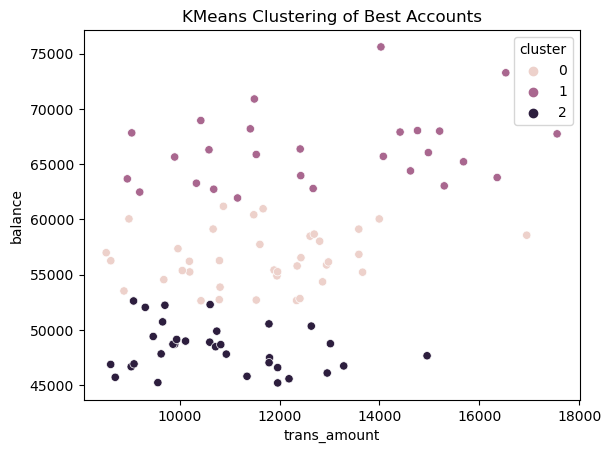

In [40]:
import pandas as pd
import sqlite3
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Connects to the SQLite database
conn = sqlite3.connect("BankRecords.db")

query = """SELECT Accounts.account_id, Transactions.trans_amount, Transactions.balance, Loans.loan_status, CityInfo.a11
           FROM Transactions
           JOIN Loans ON Transactions.account_id = Loans.account_id
           JOIN Accounts ON Loans.account_id = Accounts.account_id
           JOIN CityInfo ON Accounts.client_id = CityInfo.client_id"""

# Reads data into a DataFrame
df = pd.read_sql_query(query, conn)

# Preprocesses the data
le = LabelEncoder()
df['loan_status_encoded'] = le.fit_transform(df['loan_status'])
df['loan_status_good'] = df['loan_status_encoded'].isin([0, 2])  # A and C are 0 and 2

# Calculates means for trans_amount, balance, and a11
means = df.groupby('account_id').agg({'trans_amount': 'mean', 'balance': 'mean', 'a11': 'mean', 'loan_status_good': 'mean'}).reset_index()

# Selects accounts that meet criteria
best_accounts = means[(means['trans_amount'] > means['trans_amount'].mean()) &
                      (means['balance'] > means['balance'].mean()) &
                      (means['a11'] > means['a11'].mean()) &
                      (means['loan_status_good'])]

# Applies KMeans clustering
X = best_accounts[['trans_amount', 'balance', 'a11', 'loan_status_good']]
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
best_accounts['cluster'] = kmeans.fit_predict(X)

# Visualizes clusters
sns.scatterplot(x='trans_amount', y='balance', hue='cluster', data=best_accounts)
plt.title('KMeans Clustering of Best Accounts')
plt.show()

----
----

## Task 4: Experimental Results and Analysis (25 Marks)

Given the **five** modelling solutions implemented above, analyse, discuss and present your findings to the key stakeholders of the bank.

Your answer should clearly cover the following:
* Present your findings in a clear and concise manner;
* Discuss your results in the context of the selected solution;
* Discuss how these results can help the bank in performing customer risk assessment and establishing customer retention strategies;
* Present the limitations (if any) of your solutions in a clear and concise manner.

**World Limit**: 500 words. This limit applies only to the explanations. There is no limit on any associated code or figures.

**Write your answer here (text cell(s) to be used, as appropriate)**

My first main area of investigation was Loans and more specifically how a client could achieve a bad loan status, for risk assessment. In my first modelling solution, I looked for if there was a significant difference between loan status across cities, and according to my solution, there was a significant difference, which means some cities are better at paying loans than others. But we can’t just stop there, to make a fair decision on whether we should give a client a loan or not we need more useful data on why these areas have difficulty paying their loans. So then I looked at the demographics of cities against the worst loan statuses B and D. Where surprisingly there was no correlation between loan status and any of the demographics we checked. This means to ethically decide on whether a client should get a loan or not we cannot base the decision on their area/city at all, and the demographics of a client should not be used for fair decision-making either due to the lack of correlation. Thus our final modelling solution for finding out how a client could achieve a bad loan status comes into play. I used a supervised learning algorithm with a Random Forest Classifier (it combines the output of multiple decision trees to reach a single output) to increase the accuracy of the algorithm. First I found the correlation between spending habits and loan_status, with a 0.99 accuracy. Furthermore using that model I then was able to make a program that can predict loan status using spending habits with that same 0.99 accuracy. This will greatly help the bank in risk assessment since we can monitor a client's spending habits and then decide if they would be able to pay their loan or not and advise them on perhaps a better loan amount that would be better for them.

The second main area of investigation was to see which of our clients is the most valuable so that we can give them benefits as our customer retention scheme. My first modelling solution was used to find if there was a significant difference in mean trans_amounts and balances across different card types, and it turns out there was with the gold card type being the top spender with the highest mean trans_amount and the highest mean balance, making them our most valuable client. This means we should direct special benefits to gold card holders, which would also give clients an incentive to upgrade their cards. To know who our most valuable clients are I also made a modelling solution that can find them and the clients who we should incentivise to upgrade to a gold card. In the last diagram of Task 3 cluster 0 is our most valuable client and cluster 1 is the client we want to get an upgrade. Using this we can accurately decide which of our clients deserve benefits or incentives. Thus greatly improving our customer retention scheme and customer service.

----
----

## Task 5: Conclusion (10 Marks)

Given the insights derived from Tasks 1-4, provide a conclusion that clearly covers the following:
* A summary of the main points;
* A discussion of the significance of your results;
* Any recommendation(s) resulting from your analysis;
* Any overall ethical considerations arising from the data analysis of this business domain.

**World Limit**: 300 words.

**Write your answer here (text cell(s) to be used, as appropriate)**

From my data analysis and modelling solutions we have learned, that certain cities may experience more difficulty in paying their loans than others but there is no correlation between the area's demographics and loan status, thus we cannot judge any client by the area they live in or any demographics related to them to maintain an ethical and fair stance while making a risk assessment on if they should be granted a loan. Moreover, with my prior solutions, I also developed an extremely accurate algorithm that the bank can use to predict a client's loan status using their spending habits. The bank can use this solution to advise clients on loan amounts that would be best for the client so that they can have manageable loans. Thus improving our customer service and risk assessment by rejecting clients who are most likely not going to pay their loans. 

Additionally, we also learned that gold cardholders spend the most money and also have the highest balance out of our clients. Which makes them our most valuable clients. Therefore we should direct special advantages for gold cardholders that would help retain them as our clients while also incentivising other cardholders to try and upgrade their card to gold. This would both improve our customer retention scheme and also improve the bank's overall profits since we are increasing the number of highly valuable clients by incentivising other cardholders to upgrade, and adding new clients who want better benefits than their current bank. Furthermore, my solution for which of our clients are most valuable regardless of card type clusters our top clients together so that we know who deserves the special advantages and clusters clients who should be incentivised to upgrade.

In conclusion, I have successfully achieved all my goals to improve the overall customer service of the bank.

----
----

## Overall Academic Quality (10 Marks)
10 marks are allocated for the clarity and cohesiveness of your answers (both text and code) across all tasks with appropriate, relevant and effective analysis and presentation of the results.

## Deliverables

You should submit the following to the submission point on the teaching portal:

1. the SQLite database produced in Task 2;
2. the completed Jupyter notebook (both .ipynb and HTML files) that also includes the SQL statements (Task 2), the research design and its implementation (Task 3), and the analysis and presentation of your results (Task 4);
3. any figures or diagrams that are included in your answers in the Jupyter notebook.

For each task where text is required, we have provided guidelines above on the suggested word counts. Exceeding the word count will result in any work beyond the word count being disregarded when assessing.